#Quienes somos:


*   Alix Ivonne Chaparro Vasquez
*   Jairo Eduardo Garcia Sisa
*   Daniel Alejandro Barreto Soracá 
*   Brayan Alberto Castellanos Bernal 

---
Origen de la data:
https://drive.google.com/file/d/1oberUVGPrgR5sBMF54aLTNj2hhy181A8/view?usp=sharing




#P0. importar librerias (5%)

##P0.1 librerias genericas

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##P0.2 librerias para Machine learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics

#P1. importando dataset (5%)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df_homicidios = pd.read_csv("/content/gdrive/MyDrive/Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv")
df_homicidios.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001000,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


#P2.Conociendo y normalizando los datos (30%)


###P2.0 generales (10%)

---
*   dimensiones del dataframe
*   existen columnas con nulos?
*   todos las columnas son númericos?
*   existen valores negativos?...si existen que hacemos con ellos?


In [ ]:
df_homicidios.info()
#df_homicidios.describe()
#df_homicidios.shape()
#df_homicidios.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58760 entries, 0 to 58759
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DEPARTAMENTO          58760 non-null  object
 1   MUNICIPIO             58760 non-null  object
 2   CODIGO DANE           58760 non-null  int64 
 3   ARMAS MEDIOS          58760 non-null  object
 4   FECHA HECHO           58760 non-null  object
 5   GENERO                58760 non-null  object
 6   GRUPO ETARÍO          58760 non-null  object
 7   DESCRIPCIÓN CONDUCTA  58760 non-null  object
 8   CANTIDAD              58760 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


##P2.1 Normalizando los datos (50%)

###P2.1.1 Convertir datos object (Categoricos o Text) en Data Numerica/DateTime

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
uniqueValues = df_homicidios['GENERO'].unique()
print(sorted(uniqueValues))

['FEMENINO', 'MASCULINO', 'NO REPORTA', 'NO REPORTADO']


In [ ]:
df_homicidios.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001000,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [ ]:
DEPARTAMENTO = { 
    'AMAZONAS' : 1, 
    'ANTIOQUIA' : 2, 
    'ARAUCA' : 3,
    'ATLÁNTICO' : 4, 
    'BOLÍVAR' : 5, 
    'BOYACÁ' : 6, 
    'CALDAS' : 7 , 
    'CAQUETÁ' : 8, 
    'CASANARE' : 9, 
    'CAUCA' : 10, 
    'CESAR' : 11, 
    'CHOCÓ' : 12, 
    'CUNDINAMARCA' : 13, 
    'CÓRDOBA' : 14, 
    'GUAINÍA' : 15, 
    'GUAJIRA' : 16, 
    'GUAVIARE' : 17, 
    'HUILA' : 18, 
    'MAGDALENA' : 19, 
    'META' : 20, 
    'NARIÑO' : 21, 
    'NORTE DE SANTANDER' : 22, 
    'PUTUMAYO' : 23, 
    'QUINDÍO' : 24, 
    'RISARALDA' : 25, 
    'SAN ANDRÉS' : 26, 
    'SANTANDER' : 27, 
    'SUCRE' : 28, 
    'TOLIMA' : 29, 
    'VALLE' : 30, 
    'VAUPÉS' : 31, 
    'VICHADA' :32
}
df_homicidios['DEPARTAMENTOS ACT'] = df_homicidios['DEPARTAMENTO'].map(DEPARTAMENTO)

In [ ]:
ARMAS_MEDIOS = {
    'BICICLETA' : 1,
    'CONTUNDENTES' : 2,
    'MOTO' : 3,
    'NO REPORTADO' : 4,
    'SIN EMPLEO DE ARMAS' : 5,
    'TREN' : 6,
    'VEHICULO' :7
}
df_homicidios['ARMAS MEDIOS ACT'] = df_homicidios['ARMAS MEDIOS'].map(ARMAS_MEDIOS)

In [ ]:
GENERO = {
    'FEMENINO' : 1,
    'MASCULINO' : 2,
    'NO REPORTA' : 3,
    'NO REPORTADO' : 4
}
df_homicidios['GENERO ACT'] = df_homicidios['GENERO'].map(GENERO)

In [ ]:
le.fit(df_homicidios['FECHA HECHO'])
list(le.classes_)
df_homicidios['FECHA HECHO ACT'] = le.fit_transform(df_homicidios['FECHA HECHO'])

In [ ]:
le.fit(df_homicidios['MUNICIPIO'])
list(le.classes_)
df_homicidios['MUNICIPIO ACT'] = le.fit_transform(df_homicidios['MUNICIPIO'])

In [127]:
##df_homicidiosv2['DEPARTAMENTO ACT'] = pd.to_numeric(df_homicidiosv2['DEPARTAMENTO ACT'])                        #  convertimos el campo a numerico 
##df_homicidios['MUNICIPIO'] = pd.to_numeric(df_homicidios['MUNICIPIO'])
##df_homicidios['CODIGO DANE'] = pd.to_numeric(df_homicidios['CODIGO DANE'])
##df_homicidios['ARMAS MEDIAS'] = pd.to_numeric(df_homicidios['ARMAS MEDIAS'])
##df_homicidios['FECHA HECHO']=pd.to_datetime(df_homicidios['FECHA HECHO'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
##df_homicidios['GENERO'] = pd.to_numeric(df_homicidios['GENERO'])
##df_homicidios['GRUPO ETARÍO'] = pd.to_numeric(df_homicidios['GRUPO ETARÍO'])
##df_homicidios['DESCRIPCIÓN CONDUCTA'] = pd.to_numeric(df_homicidios['DESCRIPCIÓN CONDUCTA'])
##df_homicidios['CANTIDAD'] = pd.to_numeric(df_homicidios['CANTIDAD'])

###Eliminar datos duplicados, con variable para guardar

In [ ]:
df_homicidiosv2=df_homicidios.drop(['DEPARTAMENTO',
                                    'MUNICIPIO',
                                    'CODIGO DANE',
                                    'ARMAS MEDIOS',
                                    'FECHA HECHO',
                                    'GENERO',
                                    'GRUPO ETARÍO',
                                    'DESCRIPCIÓN CONDUCTA',
                                    'CANTIDAD'],axis=1)

###P2.1.2 normalizar todos los datos numericos entre [0, 1].

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_homicidiosv2)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns = {0:'DEPARTAMENTO',1:'MUNICIPIO',2:'CODIGO DANE',3:'ARMAS MEDIOS',4: 'FECHA HECHO', 5: 'GENERO',6: 'GRUPO ETARÍO',7: 'DESCRIPCIÓN CONDUCTA',8: 'CANTIDAD'})  

df_escalado.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO
0,0.032258,0.333333,0.333333,0.0,0.415719
1,0.096774,0.333333,0.000000,0.0,0.081696
2,0.096774,0.333333,0.333333,0.0,0.465357
3,0.225806,0.333333,0.333333,0.0,0.649431
4,0.258065,0.333333,0.333333,0.0,0.011375


###P2.1.3 exportando Data a un CSV con los arreglos (si son necesarios).

In [ ]:
#salvamos el dataFrame 
df_homicidios.to_csv('df_homicidiosv2.csv', index_label='row')

###P2.1.4 eliminar columnas que no usaremos (object) 

##P2.2 graficando datos (40%)

---

*   Gráficos circulares 
*   Gráfico de dispersión (k-means) 
*   Histogramas
*   uso de sabana de Graficas con seaborn
*   Gráfico de historico (matplotlib.legend)
*   matriz de correlación




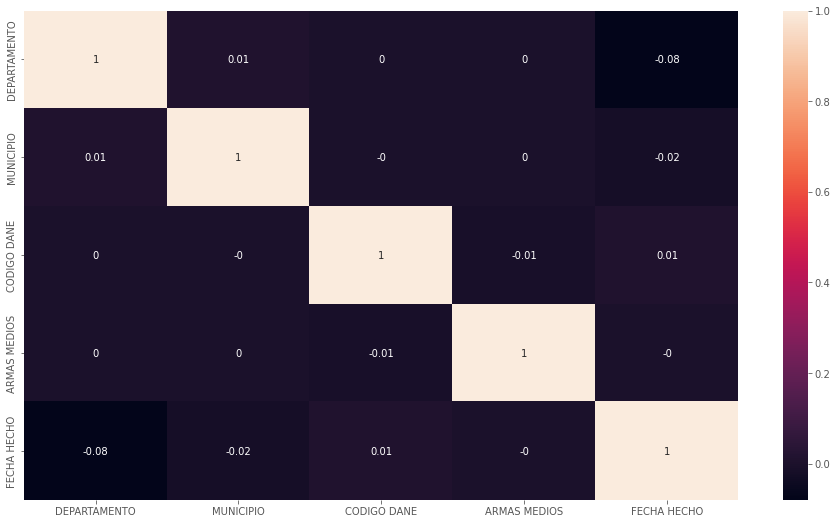

In [ ]:
##Codigo de los 
correlacion_matrix = df_escalado.corr().round(2)
sb.heatmap(data=correlacion_matrix, annot=True)

In [ ]:
df_homicidiosv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58760 entries, 0 to 58759
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   DEPARTAMENTOS ACT  58760 non-null  int64
 1   ARMAS MEDIOS ACT   58760 non-null  int64
 2   GENERO ACT         58760 non-null  int64
 3   FECHA HECHO ACT    58760 non-null  int64
 4   MUNICIPIO ACT      58760 non-null  int64
dtypes: int64(5)
memory usage: 2.2 MB


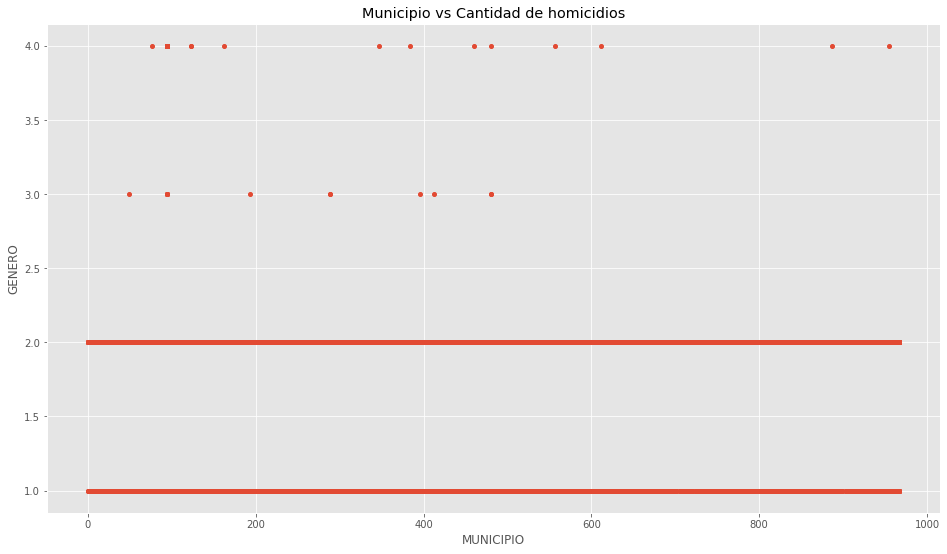

In [ ]:
from matplotlib import markers
#Representacion gracfica de los datos 
x = df_homicidiosv2['MUNICIPIO ACT'].values
y = df_homicidiosv2['GENERO ACT'].values
plt.xlabel('MUNICIPIO')
plt.ylabel('GENERO')
plt.title('Municipio vs Cantidad de homicidios')
plt.plot(x,y,'o', markersize=4)

#P3. Algoritmo de k-means (30%)

##P3.1 gráfica elbow o de codo (20%)

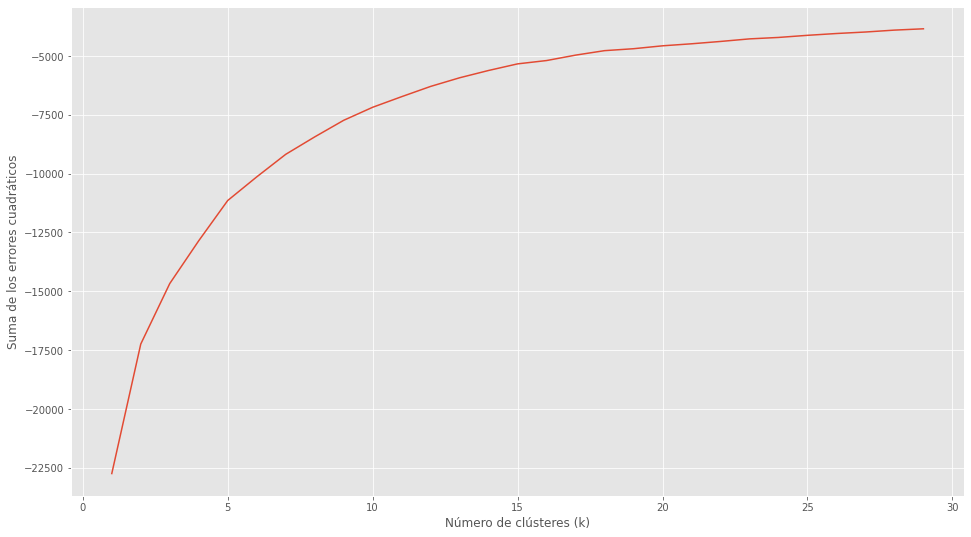

In [ ]:
#Código del grafico de codo que me premite saber cual el la cantidad de centroides ideal
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

##P3.2 buscando los centroides (30%)

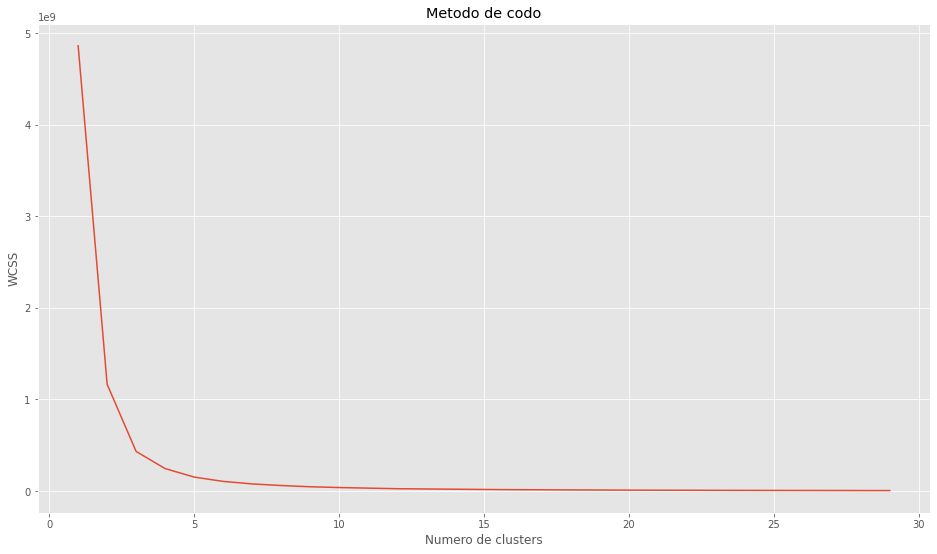

In [ ]:
# codigo fuente para buscar centroidos
#WCSS es la suma de cuadrados de las distancias
X=df_homicidiosv2[["MUNICIPIO ACT", "GENERO ACT"]]
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[102.82124987   1.79255591  14.04043705]
 [517.0913811    1.79038718  14.70864857]
 [907.88405166   1.79698157  12.04716297]
 [309.27289359   1.79581258  11.82731985]
 [728.29770141   1.80919438  15.18522651]]
[3 0 1 ... 2 2 2]


##P3.3 Etiquetado de datos. (20%)

In [130]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(X)   #generamos las etiquetas de cada clouster
df_escalado['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df_escalado.head()


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,label
0,0.032258,0.333333,0.333333,0.0,0.415719,3
1,0.096774,0.333333,0.000000,0.0,0.081696,0
2,0.096774,0.333333,0.333333,0.0,0.465357,1
3,0.225806,0.333333,0.333333,0.0,0.649431,4
4,0.258065,0.333333,0.333333,0.0,0.011375,0


##P3.4 Representación gráfica de los clústeres k-means.(20%)

---
Una vez con los datos etiquetados, generar gráficamente en dos dimensiones el clustering realizado por k-means, usar dos variables


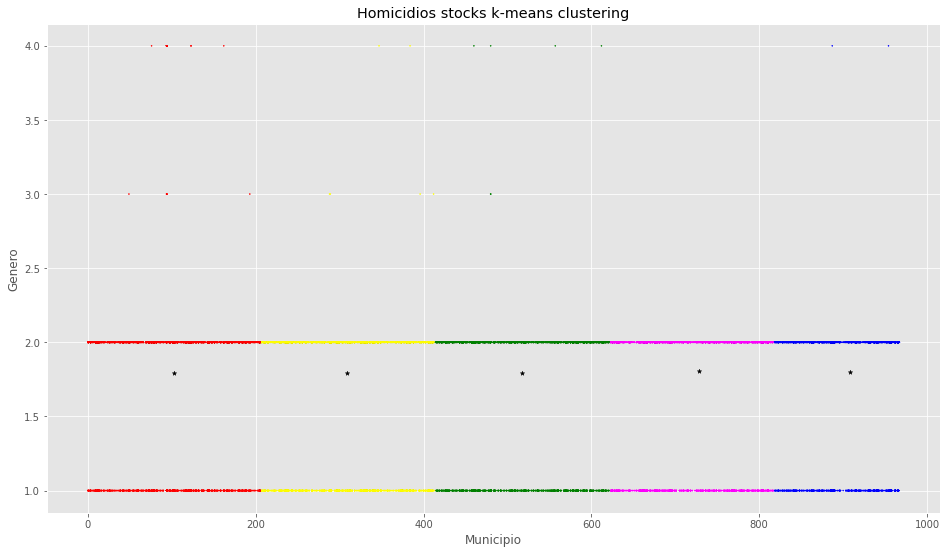

In [131]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Municipio')
plt.ylabel('Genero')
plt.title('Homicidios stocks k-means clustering')
plt.show()

##P3.5 exportar el Dataset con los labels (10%)

In [132]:
#salvamos el dataFrame 
df_escalado.to_csv('df_escalado.csv', index_label='row')

#P4.algoritmo de machine Learning  (30%)

---

Seleccione un algoritmo (regresión lineal ó regresión logistica ó arboles de clasificación) que tenga la mejor inferencia

##P4.1 Preparación de los datos para el entrenamiento del modelo (10%)

##P4.2 Dividir los datos en conjuntos de entrenamiento (X %) y pruebas (X %) (30%)

In [ ]:
# x = df_colombiaV2.iloc[:, :11].values
# y = df_colombiaV2.iloc[:, 11].values

# x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.30)


##P4.3 Entrenando el modelo (20%)

In [ ]:
#solver = 'lbfgs'
#solver = 'newton-cg'
# modelIA = LogisticRegression(multi_class= 'multinomial',solver = 'lbfgs', max_iter=400,penalty='l2',c=1.0)
# modelIA.fit(x_train,y_train)

##P4.4 Evaluación del modelo (40%)


##P4.5 la predicción es superior a 80%???